In [28]:
from ipynb.fs.full.data_cleaning import df, serviceDf
import pandas as pd
import numpy as np
from numpy import NaN
import matplotlib
import matplotlib.pyplot as plt

df.sample(3)

,Segments,Services,Type,Service,Hires,Price,Price Type,Rating,Zip Code,Capital City,State,Abbreviation,Implied Revenue
43299,Events,Photo Booth Rental,Main,Picture Perfect Photo Booth Rental (Kentucky),NaN,NaN,,NaN,40601,Frankfort,Kentucky,KY,NaN
45394,Home Improvement,Brick or Stone Repair,Peripheral,Guerrero's Contracting,15.00,NaN,,5.00,80202,Denver,Colorado,CO,NaN
37818,Home Improvement,House Cleaning,Main,GiGi's Cleaning Service,7.00,110.00,,5.00,77002,Houston,Texas,TX,770.00


In [2]:
df.shape

(17912, 13)

**General quetions:**
1. Which segments is Thumbtack focusing on? Or is Thumbtack consistent in all segments & services?
2. Does the demand & supply in services change from a region to another?
3. Which segments are doing better or worse?
4. Is Thumbtack offering this many services because they have a low # hires/# sellers rate?
5. Are there any segments or services that showcase more uncaptured potential?
6. What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?

# Which segments is Thumbtack focusing on?

## Count by Segment

We can first see a basic count of services for each segment.

In [3]:
# See ranking by count
segmentCount = df.groupby("Segments")["Segments"].count()
dfSegmentCount = segmentCount.to_frame(name="Count").reset_index()
dfSegmentCount["Contribution"] = dfSegmentCount["Count"] / dfSegmentCount["Count"].sum()
dfSegmentCount.sort_values(by="Count", ascending=False)

,Segments,Count,Contribution
2,Home Improvement,9551,0.53
1,Events,3486,0.19
5,Wellness,1595,0.09
3,Lessons,1493,0.08
0,Business,1254,0.07
4,Pets,533,0.03


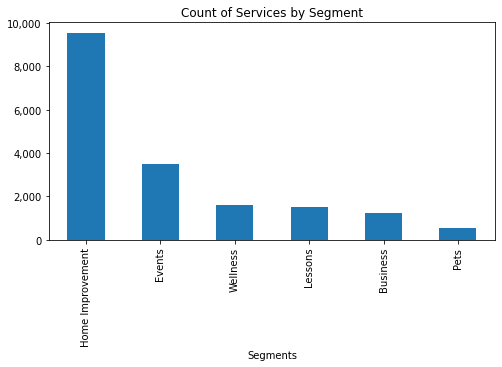

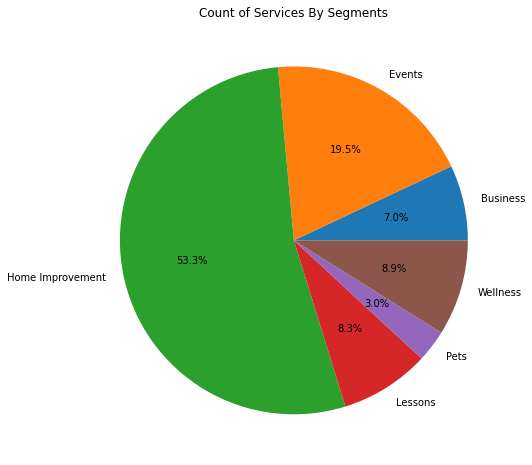

In [4]:
segmentCount.sort_values(ascending=False).plot.bar(
    title="Count of Services by Segment", figsize=(8, 4)
)
current_values = plt.gca().get_yticks()
plt.gca().set_yticklabels(["{:,.0f}".format(x) for x in current_values])
plt.show()

segmentCount.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Segments",
    y="Count",
    ylabel="",
    figsize=(8, 8),
)
plt.show()

## Count by Services

This is to see the counts for specific services like DJ, massage therapy, etc.

In [5]:
# See ranking by count
servicesCount = df.groupby("Services")["Services"].count()
dfServicesCount = servicesCount.to_frame(name="Count").reset_index()
dfServicesCount["Contribution"] = (
    dfServicesCount["Count"] / dfServicesCount["Count"].sum()
)
dfServicesCount.sort_values(by="Count", ascending=False)[:19]

,Services,Count,Contribution
71,Roof Repair or Maintenance,858,0.05
86,Wedding Officiant,839,0.05
33,Commercial Cleaning,834,0.05
1,Accounting,791,0.04
31,Closet and Shelving System Installation,770,0.04
88,Wedding and Event Makeup,712,0.04
56,Massage Therapy,697,0.04
44,DJ,684,0.04
52,Interior Design,627,0.04
51,House Cleaning,507,0.03


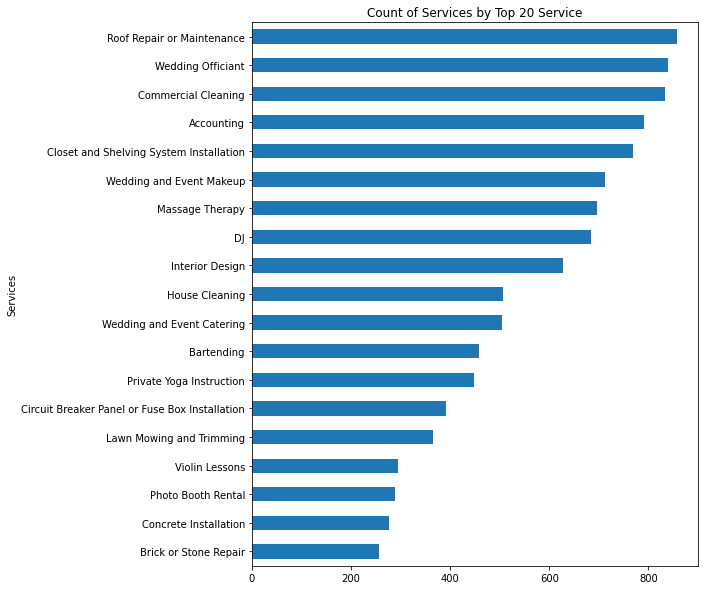

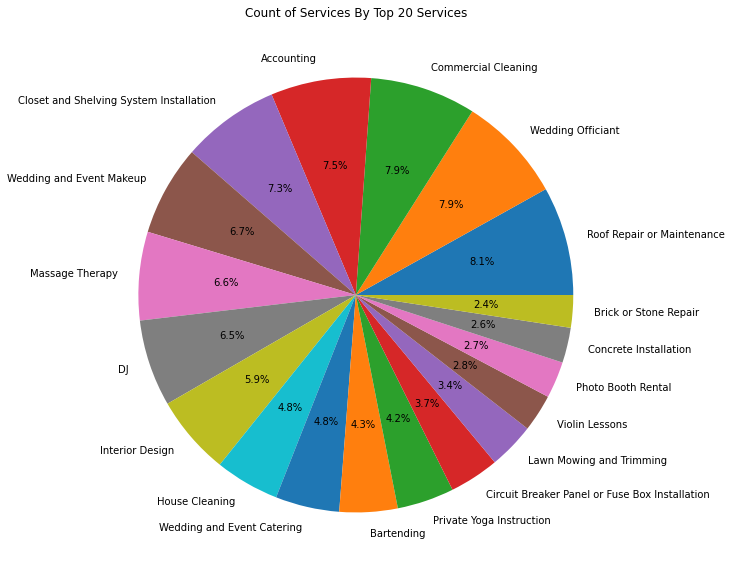

In [6]:
servicesCountChart = servicesCount.sort_values(ascending=False)[:19]
servicesCountChart.sort_values(ascending=True).plot.barh(
    title="Count of Services by Top 20 Service", xlabel="Services", figsize=(8, 10)
)
plt.show()

servicesCountChart.plot.pie(
    autopct="%.1f%%",
    title="Count of Services By Top 20 Services",
    y="Count",
    ylabel="",
    figsize=(10, 10),
)
plt.show()

Then we can maybe see implied revenue from these segments

In [7]:
# Get sum of implied revenue by segment
dfRevenuBySegment = (
    df.groupby("Segments")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuBySegment["Contribution"] = (
    dfRevenuBySegment["Implied Revenue"] / dfRevenuBySegment["Implied Revenue"].sum()
)

# Get sum of implied revenue by services
dfRevenuByServices = (
    df.groupby("Services")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByServices["Contribution"] = (
    dfRevenuByServices["Implied Revenue"] / dfRevenuByServices["Implied Revenue"].sum()
)

# Get sum of implied revenue by states
dfRevenuByRevenue = (
    df.groupby("State")["Implied Revenue"]
    .sum()
    .to_frame(name="Implied Revenue")
    .reset_index()
)
dfRevenuByRevenue["Contribution"] = (
    dfRevenuByRevenue["Implied Revenue"] / dfRevenuByRevenue["Implied Revenue"].sum()
)

In [8]:
# See implied revenue by segment
dfRevenuBySegment.sort_values(by="Contribution", ascending=False)

,Segments,Implied Revenue,Contribution
2,Home Improvement,"24,563,349.00",0.43
1,Events,"21,770,915.00",0.39
0,Business,"4,122,263.00",0.07
5,Wellness,"3,562,406.00",0.06
3,Lessons,"2,172,309.00",0.04
4,Pets,"304,754.00",0.01


In [9]:
# See top 10 implied revenue by services
dfRevenuByServices.sort_values(by="Contribution", ascending=False)[:9]

,Services,Implied Revenue,Contribution
86,Wedding Officiant,"9,046,401.00",0.16
44,DJ,"5,589,660.00",0.10
61,Photo Booth Rental,"3,617,129.00",0.06
14,Bed Bug Extermination,"3,336,025.00",0.06
32,Commercial Carpet Cleaning,"3,195,400.00",0.06
33,Commercial Cleaning,"2,424,420.00",0.04
56,Massage Therapy,"2,149,258.00",0.04
28,Circuit Breaker Panel or Fuse Box Installation,"2,068,216.00",0.04
88,Wedding and Event Makeup,"1,802,999.00",0.03


In [10]:
# See top 10 implied revenue by zipcode
dfRevenuByRevenue.sort_values(by="Contribution", ascending=False)[:9]

,State,Implied Revenue,Contribution
4,California,"7,697,235.00",0.14
43,Texas,"5,754,383.00",0.10
9,Florida,"3,624,092.00",0.06
30,New Jersey,"2,567,597.00",0.05
32,New York,"2,260,447.00",0.04
33,North Carolina,"2,133,778.00",0.04
5,Colorado,"2,013,176.00",0.04
10,Georgia,"2,007,646.00",0.04
25,Missouri,"1,946,559.00",0.03


# Does the demand & supply in services change from a region to another?

Outputs per regional segments & services:
- \# services
- \# hires
- \# hires/#services rate
- List of sellers per region

# Which segments are doing better or worse?

# Is Thumbtack offering this many services because they have a low #hires/#sellers rate?

## Hires by Segment

In [11]:
# See ranking by count
hiresCount = df.groupby("Segments")["Hires"].sum()
dfHiresCount = hiresCount.to_frame(name="Total Hires").reset_index()
dfHiresCount["Contribution"] = (
    dfHiresCount["Total Hires"] / dfHiresCount["Total Hires"].sum()
)
dfHiresCount.sort_values(by="Total Hires", ascending=False)

,Segments,Total Hires,Contribution
2,Home Improvement,"348,518.00",0.58
1,Events,"129,867.00",0.22
5,Wellness,"38,272.00",0.06
0,Business,"37,767.00",0.06
3,Lessons,"31,698.00",0.05
4,Pets,"12,814.00",0.02


### The Hires Ratio

The hires ratio is essentially the percentage of hires over the total number of listing available in that segment/services. This is to see which segment/services gets more customers than others. In other words, it would be a proxy for demand and supply.

In [12]:
# Merge count and hires
dfCountMerge = pd.merge(
    dfSegmentCount[["Segments", "Count"]],
    dfHiresCount[["Segments", "Total Hires"]],
    how="left",
    left_on="Segments",
    right_on="Segments",
)

dfCountMerge["Hire Ratio"] = dfCountMerge["Total Hires"] / dfCountMerge["Count"]
dfCountMerge.sort_values(by="Hire Ratio", ascending=False)

,Segments,Count,Total Hires,Hire Ratio
1,Events,3486,"129,867.00",37.25
2,Home Improvement,9551,"348,518.00",36.49
0,Business,1254,"37,767.00",30.12
4,Pets,533,"12,814.00",24.04
5,Wellness,1595,"38,272.00",23.99
3,Lessons,1493,"31,698.00",21.23


## Hires by Services

Look at the top 20.

In [27]:
# See ranking by count
hiresCountServices = df.groupby("Services")["Hires"].sum()
dfHiresCountServices = hiresCountServices.to_frame(name="Total Hires").reset_index()
dfHiresCountServices["Contribution"] = (
    dfHiresCountServices["Total Hires"] / dfHiresCountServices["Total Hires"].sum()
)

dfHiresCountServices = pd.merge(
    dfHiresCountServices,
    serviceDf[["Segments", "Services"]],
    on="Services",
    how="inner",
).drop_duplicates()

dfHiresCountServices.sort_values(by="Total Hires", ascending=False)[:19]

,Services,Total Hires,Contribution,Segments
122,Wedding Officiant,"42,478.00",0.07,Events
39,Commercial Cleaning,"31,271.00",0.05,Home Improvement
54,DJ,"23,840.00",0.04,Events
26,Carpet Cleaning,"23,554.00",0.04,Home Improvement
126,Wedding and Event Makeup,"22,463.00",0.04,Events
77,Massage Therapy,"22,022.00",0.04,Wellness
38,Commercial Carpet Cleaning,"21,586.00",0.04,Home Improvement
37,Closet and Shelving System Installation,"20,066.00",0.03,Home Improvement
34,Circuit Breaker Panel or Fuse Box Installation,"19,456.00",0.03,Home Improvement
65,House Cleaning,"19,038.00",0.03,Home Improvement


### The Hires Ratio

In [25]:
# Merge count and hires
dfCountMergeServices = pd.merge(
    dfServicesCount[["Services", "Count"]],
    dfHiresCountServices[["Services", "Total Hires"]],
    how="left",
    left_on="Services",
    right_on="Services",
)

dfCountMergeServices["Hire Ratio"] = (
    dfCountMergeServices["Total Hires"] / dfCountMergeServices["Count"]
)

dfCountMergeServices = pd.merge(
    dfCountMergeServices.drop_duplicates(),
    serviceDf[["Segments", "Services"]].drop_duplicates(),
    on="Services",
    how="inner",
).drop_duplicates()

dfCountMergeServices = dfCountMergeServices[
    ~dfCountMergeServices.duplicated("Services", keep="first")
]

dfCountMergeServices.sort_values(by="Hire Ratio", ascending=False)[:19]

,Services,Count,Total Hires,Hire Ratio,Segments
5,Appliance Repair or Maintenance,96,"11,418.00",118.94,Home Improvement
25,Carpet Repair or Partial Replacement,49,"5,564.00",113.55,Home Improvement
59,Logo Design,52,"5,573.00",107.17,Business
33,Commercial Carpet Cleaning,203,"21,586.00",106.33,Home Improvement
3,Appliance Installation,146,"14,641.00",100.28,Home Improvement
22,Carpet Cleaning,243,"23,554.00",96.93,Home Improvement
88,Test Prep Services,33,"2,998.00",90.85,Lessons
26,Cat Grooming,44,"3,754.00",85.32,Pets
15,Bed Bug Extermination,225,"16,473.00",73.21,Home Improvement
35,Computer Repair,193,"13,949.00",72.27,Business


# Are there any segments or services that showcase more uncaptured potential?

# What types of sellers are the most successful? Individuals or business? Does it depend on the type of service and/or region?